In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm

from data import train_X_list, train_y_list, test_X_list, test_y_list
from structures import DecisionTree, RandomForest
from quality import test_classifier

In [2]:
forest_size = 10
datasets = range(21)
tree_f_scores = []
random_objects_forest_f_scores = []
random_features_forest_f_scores = []

In [3]:
for dataset_index in tqdm(datasets):
    tree = DecisionTree(10)
    random_objects_forest = RandomForest(is_random_objects=True)
    random_features_forest = RandomForest(is_random_features=True)
    
    tree.fit(train_X_list[dataset_index], train_y_list[dataset_index])
    random_objects_forest.fit(train_X_list[dataset_index], train_y_list[dataset_index], forest_size)
    random_features_forest.fit(train_X_list[dataset_index], train_y_list[dataset_index], forest_size)
    
    tree_f_scores.append(test_classifier(tree, test_X_list[dataset_index], test_y_list[dataset_index]))    
    random_objects_forest_f_scores.append(
        test_classifier(random_objects_forest, test_X_list[dataset_index], test_y_list[dataset_index]))
    random_features_forest_f_scores.append(
        test_classifier(random_features_forest, test_X_list[dataset_index], test_y_list[dataset_index]))    

100%|██████████| 21/21 [1:49:03<00:00, 311.60s/it]


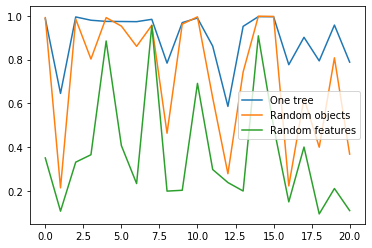

In [4]:
plt.plot(datasets, tree_f_scores, label='One tree')
plt.plot(datasets, random_objects_forest_f_scores, label='Random objects')
plt.plot(datasets, random_features_forest_f_scores, label='Random features')
plt.legend()
plt.show()